# Task 1: EDA and Visualization (Titanic Dataset)
This notebook performs exploratory data analysis (EDA) on the Titanic dataset provided.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("train.csv")
df.head()


Matplotlib is building the font cache; this may take a moment.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Cleaning

In [5]:
raw_shape = df.shape

clean = df.copy()
num_cols = clean.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = clean.select_dtypes(exclude=[np.number]).columns.tolist()

for c in num_cols:
    clean[c] = clean[c].fillna(clean[c].median())
for c in cat_cols:
    clean[c] = clean[c].fillna(clean[c].mode().iloc[0])

clean = clean.drop_duplicates()
clean.shape


(891, 12)

## Visualizations

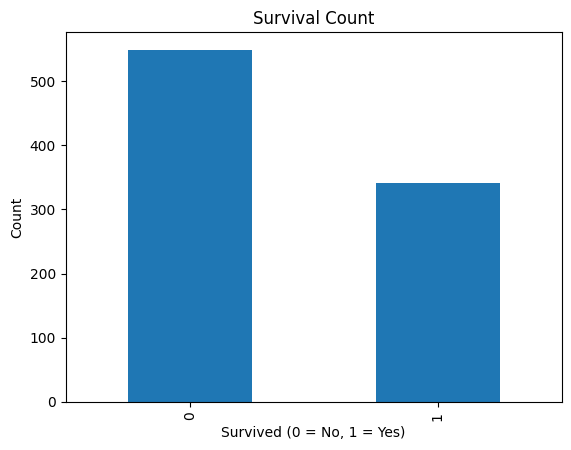

In [6]:
# Bar chart: Survived counts
clean['Survived'].value_counts().plot(kind='bar', title='Survival Count')
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


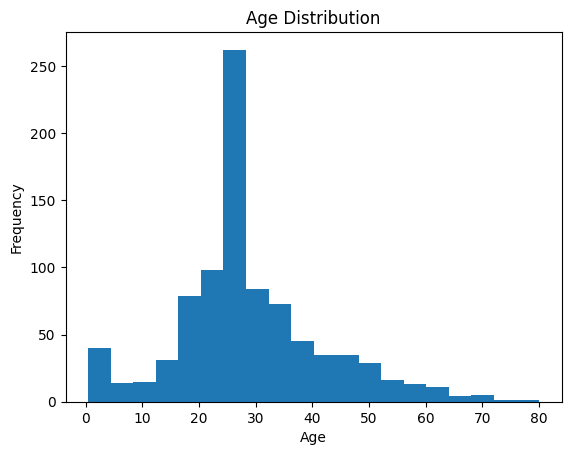

In [7]:
# Histogram: Age distribution
clean['Age'].plot(kind='hist', bins=20, title='Age Distribution')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


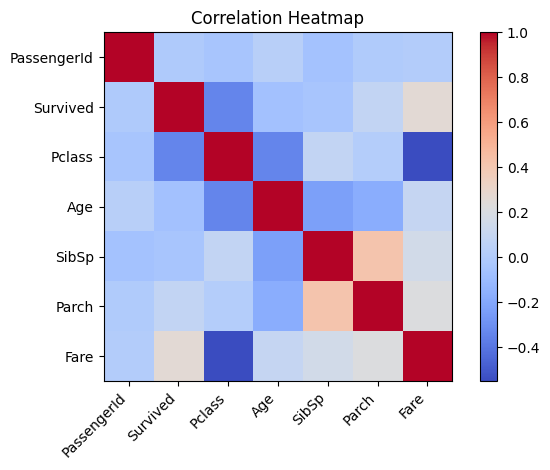

In [8]:
# Correlation heatmap (numeric features)
num_cols = clean.select_dtypes(include=[np.number]).columns.tolist()
corr = clean[num_cols].corr()
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.xticks(range(len(num_cols)), num_cols, rotation=45, ha="right")
plt.yticks(range(len(num_cols)), num_cols)
plt.title("Correlation Heatmap")
plt.colorbar()
plt.tight_layout()
plt.show()


## Summary of Insights

In [9]:
desc = clean[num_cols].describe().T
corr = clean[num_cols].corr()

observations = []
observations.append(f"Original dataset shape: {raw_shape}, after cleaning: {clean.shape}.")
observations.append(f"Age ranges {desc.loc['Age','min']:.1f}–{desc.loc['Age','max']:.1f}, median ≈ {desc.loc['Age','50%']:.1f}.")
observations.append(f"Survival counts: {clean['Survived'].value_counts().to_dict()}.")
observations.append("Correlation heatmap shows moderate relationships (e.g., Fare with Pclass/Survived).")

for o in observations:
    print("- " + o)


- Original dataset shape: (891, 12), after cleaning: (891, 12).
- Age ranges 0.4–80.0, median ≈ 28.0.
- Survival counts: {0: 549, 1: 342}.
- Correlation heatmap shows moderate relationships (e.g., Fare with Pclass/Survived).
